# Rat OGD Circularity Range

Teng-Jui Lin

22 May 2022

Objective: We demonstrate that although C > 1 obtained by `skimage.measure.regionprops` exists, they are only a small to negligible fraction of our data. These C > 1 values are caused by small object sizes.

## Background

Circularity is defined as 

$$C = 4 \pi \dfrac{A}{P^2},$$

where A is the object's area, and P is the object's perimeter. Assuming continuous area and perimeter, circularity has a range of (0, 1], with a circle having a circularity of 1:

$$
C_{\mathrm{circ}} = 4 \pi \dfrac{A}{P^2} = 4 \pi \dfrac{\pi r^2}{(\pi \frac{r}{2})^2} =  \dfrac{4 \pi^2 r^2}{ \frac{\pi^2 r^2}{4}} = 1
$$

In image processing, [area and perimeter](http://www.inf.u-szeged.hu/ssip/2008/presentations2/SSIP2008LectureSladoje.pdf) are calculated discretely, therefore having deviation from the theoretical range based on continuous area and perimeter. [For object with small radius (r < 12), the calculated discrete perimeter is less than if it's continuous.](https://github.com/scikit-image/scikit-image/issues/3573) 

### Setup data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import pandas as pd
import vampire as vp
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
vp.plot.set_plot_style()

In [2]:
output_path = r'C:\Files\github-projects\nance-lab-data\microfiber\result\result-2022-05-20-rat-ogd'
property_path = os.path.join(output_path, 'labeled-apply-properties_otsu_on_otsu_(50_5_32)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)
otsu_properties_df = apply_properties_df[apply_properties_df['threshold'] == 'Otsu']

In [3]:
otsu_properties_df.head()

filename  image_id  label          y  \
0  4-50-10_40x_cortex_1_otsu_thresh.tif         0      1  15.287546   
1  4-50-10_40x_cortex_1_otsu_thresh.tif         0      2  10.072993   
2  4-50-10_40x_cortex_1_otsu_thresh.tif         0      3  17.034161   
3  4-50-10_40x_cortex_1_otsu_thresh.tif         0      4  14.797945   
4  4-50-10_40x_cortex_1_otsu_thresh.tif         0      5  16.157895   

            x  area   perimeter  major_axis_length  minor_axis_length  \
0  435.902930   546  151.331998          43.249832          20.983343   
1  326.744526   137   52.870058          18.821565          10.968044   
2  173.686335   322   80.390873          21.623979          20.497617   
3  359.595890   292  121.396970          35.454355          19.406167   
4  294.768421    95   38.970563          13.720758           9.320021   

   eccentricity  ...                                        raw_contour  \
0      0.874422  ...  [[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...   
1      0.812660  ...  [[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...   
2      0.318534  ...  [[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...   
3      0.836900  ...  [[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...   
4      0.733894  ...  [[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...   

   circularity aspect_ratio  \
0     0.299599     2.061151   
1     0.615901     1.716037   
2     0.626112     1.054951   
3     0.248987     1.826963   
4     0.786068     1.472181   

                                  normalized_contour  cluster_id  \
0  [1.27894089508469, 1.1456402142149331, 1.22286...           0   
1  [1.2105649636463365, 1.169584766265315, 1.2661...           0   
2  [1.0070992333054543, 0.8511732667483881, 0.732...           1   
3  [1.4177535446865557, 1.1815271564991154, 1.056...           3   
4  [1.1107822170796608, 1.0716873569624206, 1.010...           0   

  distance_to_centroid  slice_id       treatment  region threshold  
0             0.649145   4-50-10  Normal Control  Cortex      Otsu  
1             0.944191   4-50-10  Normal Control  Cortex      Otsu  
2             0.713021   4-50-10  Normal Control  Cortex      Otsu  
3             0.855888   4-50-10  Normal Control  Cortex      Otsu  
4             0.878832   4-50-10  Normal Control  Cortex      Otsu  

[5 rows x 22 columns]

In [4]:
# get entries with over range circularity
circularity_cond = otsu_properties_df['circularity'] > 1
over_range_df = otsu_properties_df[circularity_cond]
over_range_df.head()

filename  image_id  label           y  \
838   4-50-10_40x_hippocampus_3_otsu_thresh.tif        14     51  237.731884   
1056     4-50-10_40x_thalamus_1_otsu_thresh.tif        18     32   92.987805   
1452     4-50-10_40x_thalamus_2_otsu_thresh.tif        20     62  167.417722   
2030     4-50-10_40x_thalamus_5_otsu_thresh.tif        24     12   37.417722   
3389     4-50-11_40x_thalamus_3_otsu_thresh.tif        42     32  192.716049   

               x  area  perimeter  major_axis_length  minor_axis_length  \
838     8.260870   138  41.213203          15.046174          11.711990   
1056  342.207317    82  31.556349          10.726980           9.765439   
1452  270.632911    79  30.970563          11.428160           8.850008   
2030  304.911392    79  31.313708          10.793716           9.335979   
3389  229.827160    81  31.556349          11.289154           9.225398   

      eccentricity  ...                                        raw_contour  \
838       0.627765  ...  [[11, 13, 13, 14, 14, 10, 3, 0, 0, 2, 2, 3, 4,...   
1056      0.413812  ...  [[5, 6, 7, 8, 8, 9, 9, 7, 7, 5, 4, 3, 2, 1, 0,...   
1452      0.632692  ...  [[7, 10, 10, 9, 9, 8, 7, 6, 5, 4, 2, 0, 0, 1, ...   
2030      0.501865  ...  [[4, 6, 6, 7, 8, 8, 6, 2, 0, 0, 1, 1, 2, 3], [...   
3389      0.576366  ...  [[6, 7, 9, 9, 10, 10, 8, 8, 7, 2, 0, 0, 4], [0...   

      circularity aspect_ratio  \
838      1.020978     1.284681   
1056     1.034785     1.098464   
1452     1.034996     1.291316   
2030     1.012437     1.156142   
3389     1.022166     1.223704   

                                     normalized_contour  cluster_id  \
838   [1.1521401458954728, 1.15139204250726, 1.10617...           1   
1056  [1.0469574147475558, 1.024848075371917, 0.9572...           1   
1452  [1.0702831055519255, 1.0500097048011268, 1.014...           1   
2030  [1.0831942609462528, 1.067930434329102, 1.0365...           1   
3389  [1.0664606244984929, 1.031934662376574, 0.9822...           1   

     distance_to_centroid  slice_id       treatment       region threshold  
838              0.683565   4-50-10  Normal Control  Hippocampus      Otsu  
1056             0.520298   4-50-10  Normal Control     Thalamus      Otsu  
1452             0.745219   4-50-10  Normal Control     Thalamus      Otsu  
2030             0.438925   4-50-10  Normal Control     Thalamus      Otsu  
3389             0.558915   4-50-11  OGD 3.0h + SOD     Thalamus      Otsu  

[5 rows x 22 columns]

### Value of circularity deviation is minor

The deviation from theoretical maximum is minor as shown by the mean and median:

In [5]:
over_range_df['circularity'].mean()

1.0269457841419718

In [6]:
over_range_df['circularity'].median()

1.0209775785120345

### Fraction of objects with circularity deviation is neglegible 

The number of over-range entries is small to neglegible:

In [7]:
# number of over range entries
over_range_df['circularity'].size

35

In [8]:
# ratio of over range entries
over_range_df['circularity'].size / otsu_properties_df['circularity'].size

0.0017027487229384578

### Objects with circularity deviation has small radius

The characteristic length (major axis length) of the over-range entries are small, consistent with reported deviation at small radius. Note that not all small objects will have such problem. Only ones that are circular may have C > 1. Therefore, the over-range entries can be regarded as having C = 1.

In [9]:
over_range_df['major_axis_length'].median()

11.83310201125619

In [10]:
over_range_df['major_axis_length'].max()

17.45571216959118

In [11]:
otsu_properties_df['major_axis_length'].median()

22.744860390762458

### Objects with circularity deviation of C > 1 can be approximated by circles

Many of the over-range objects are highly circular.

C:\Users\owen4\AppData\Local\Temp\ipykernel_12008\3736098077.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))


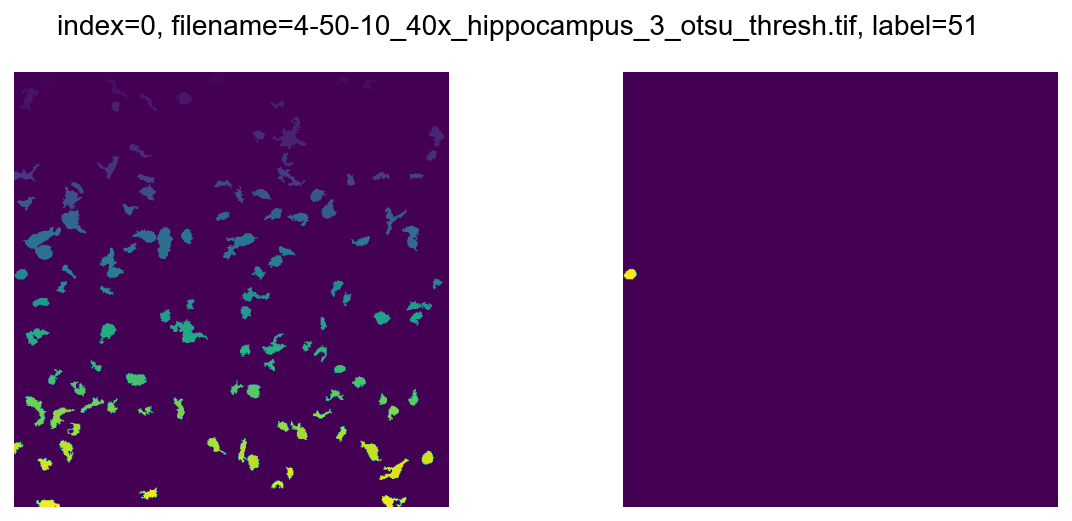

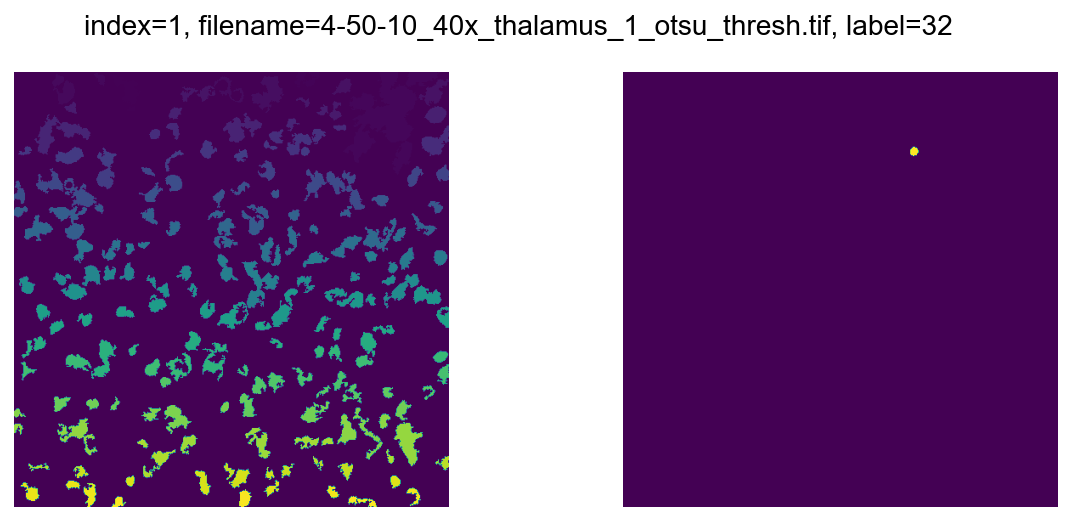

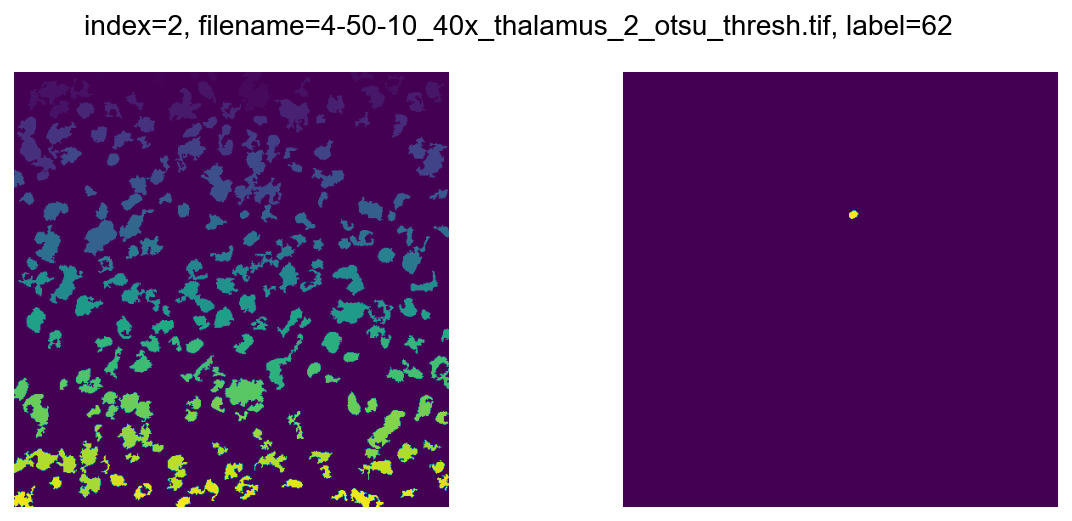

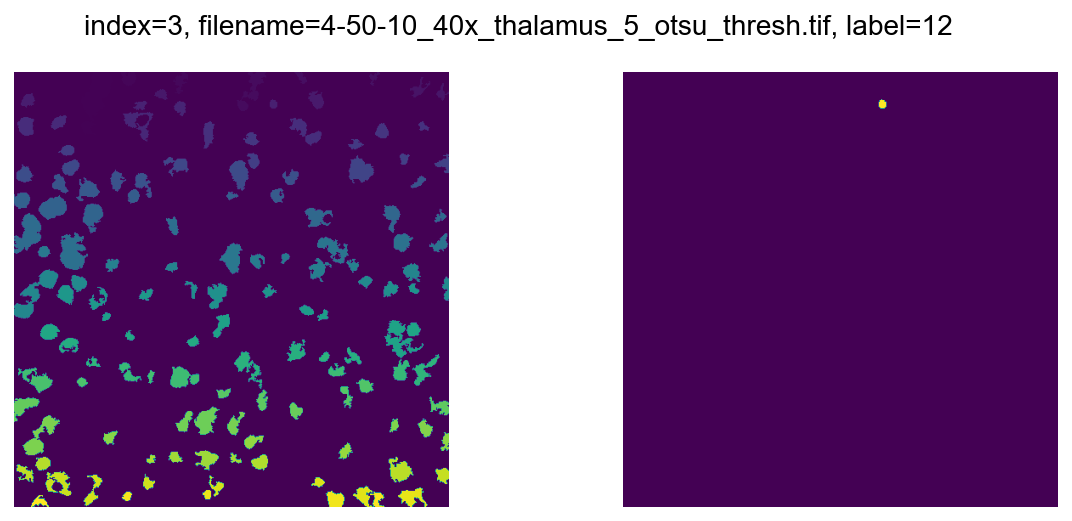

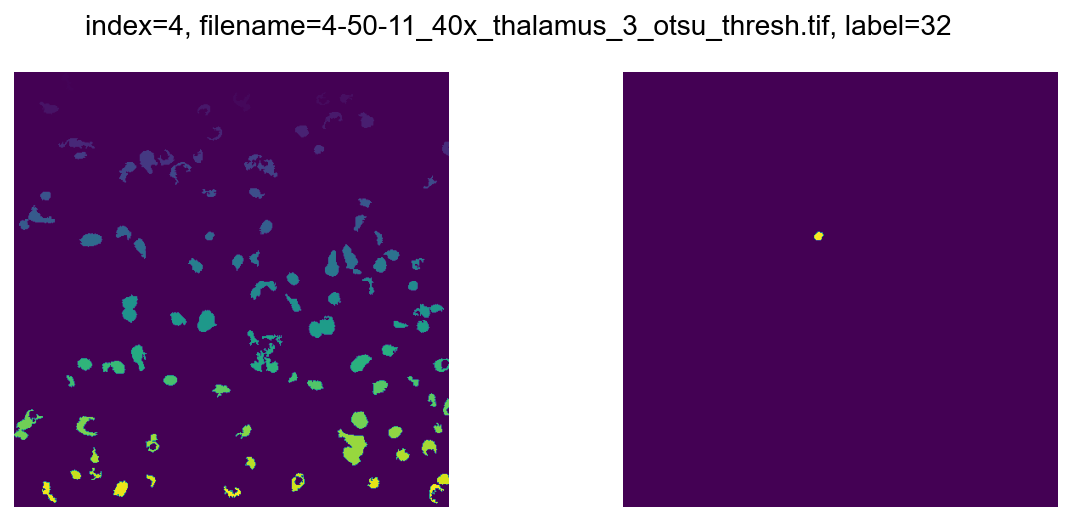

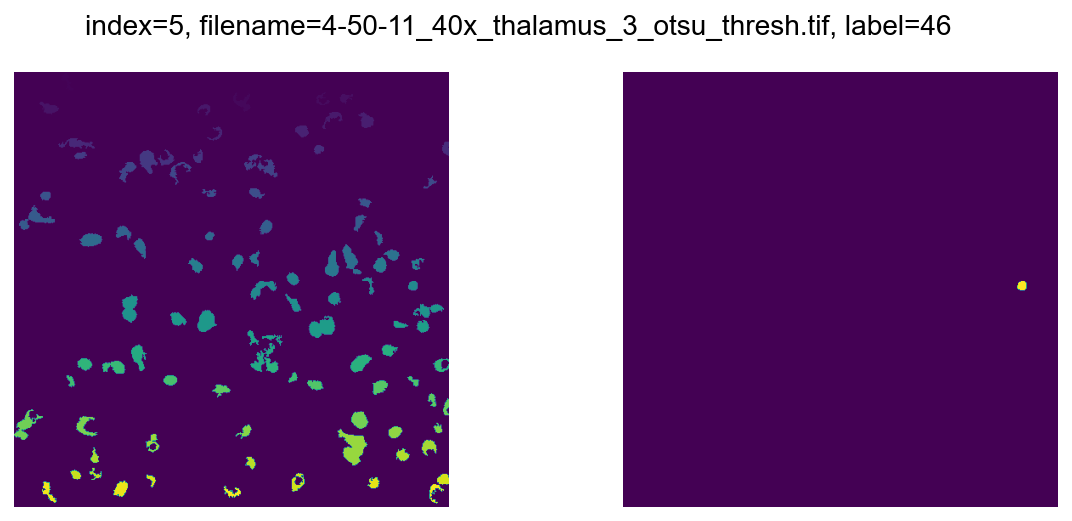

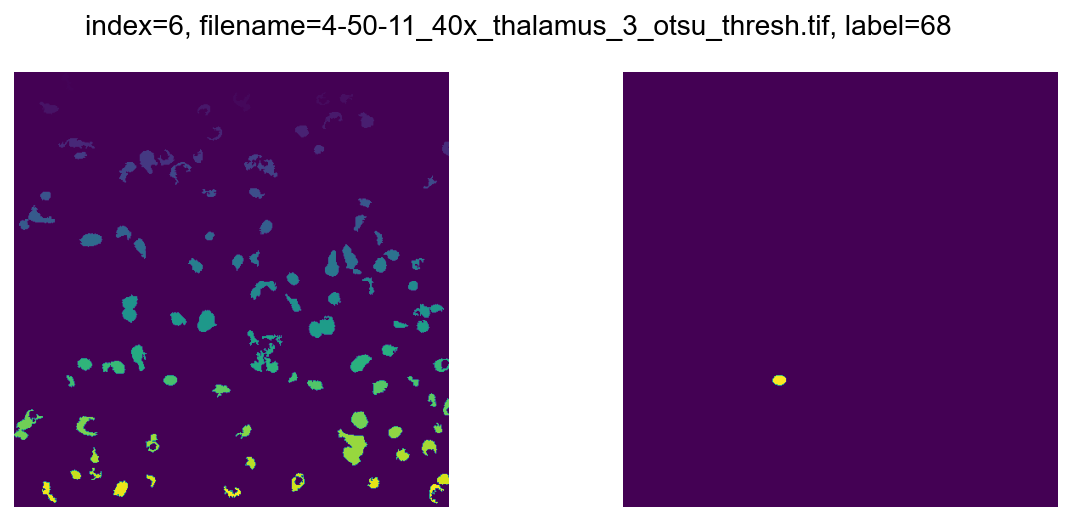

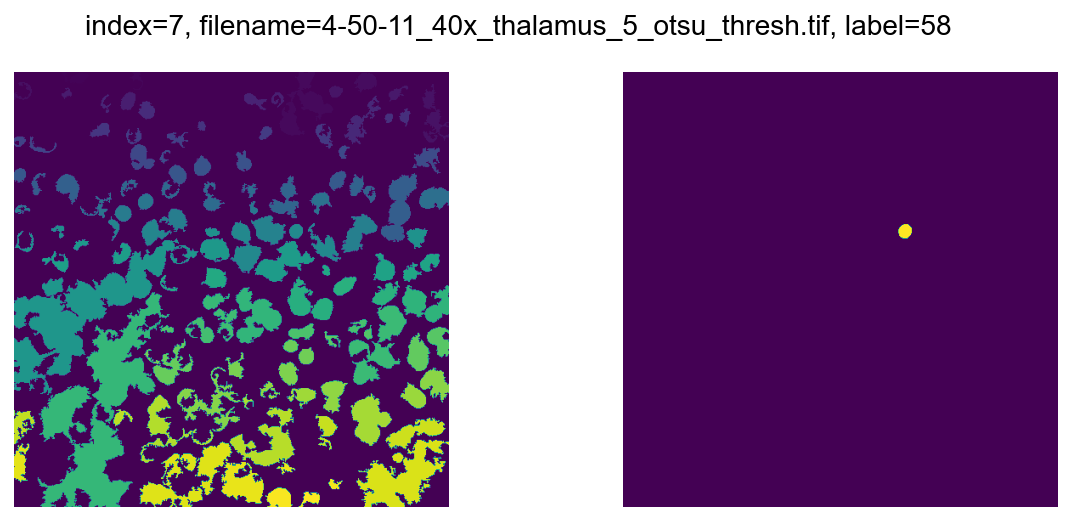

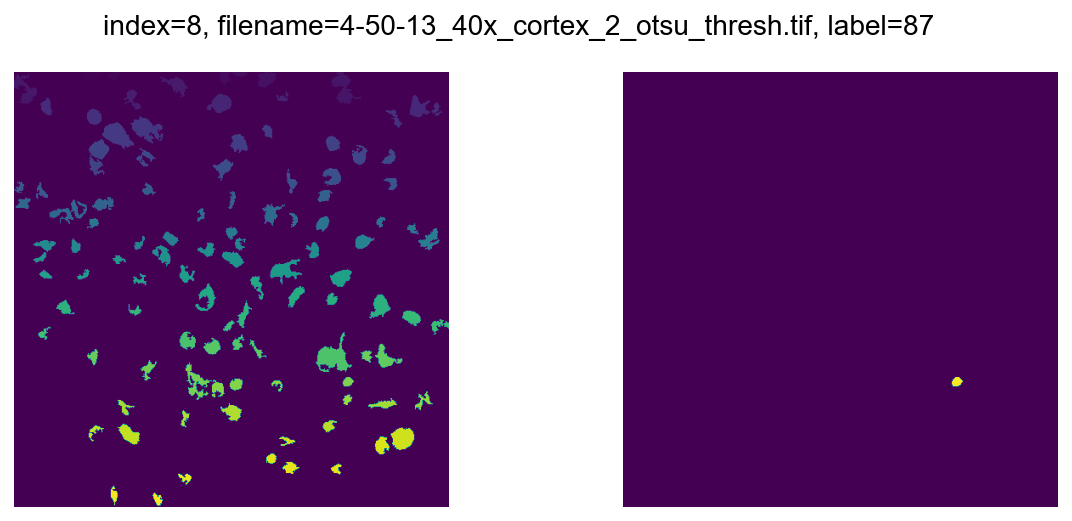

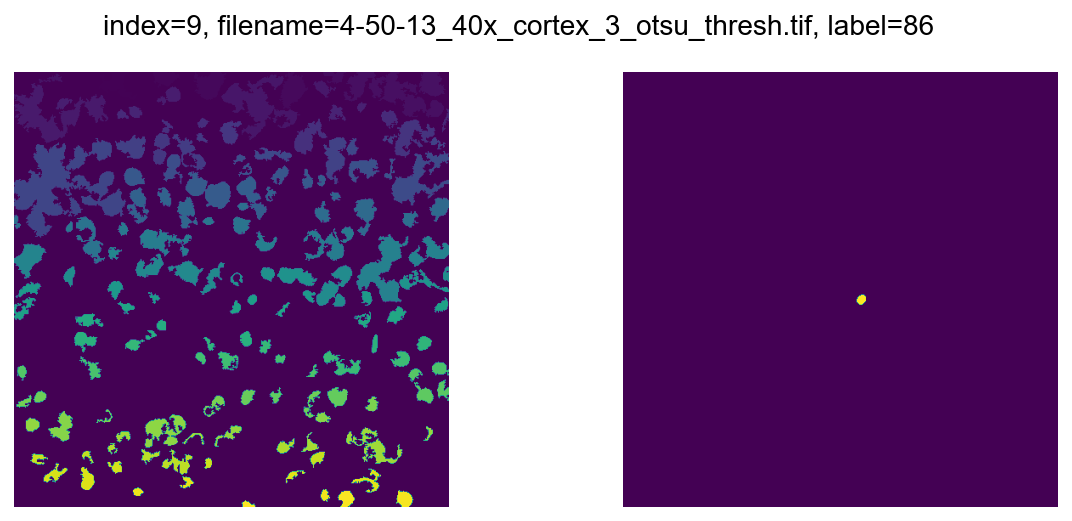

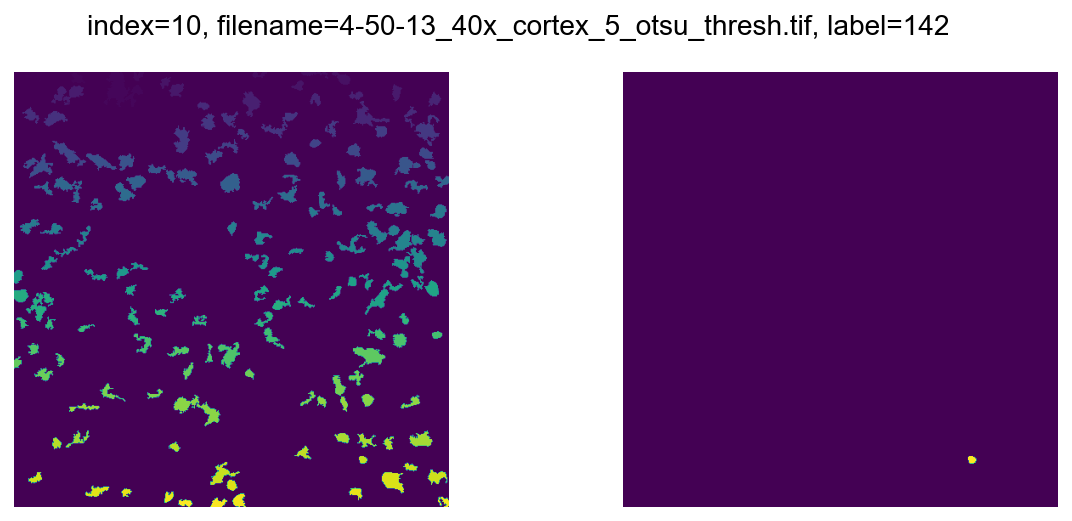

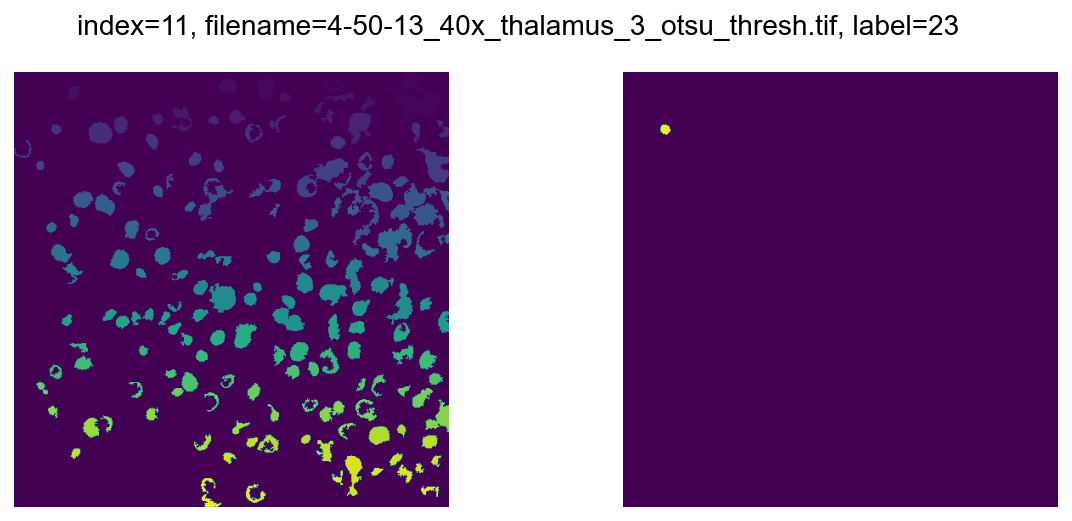

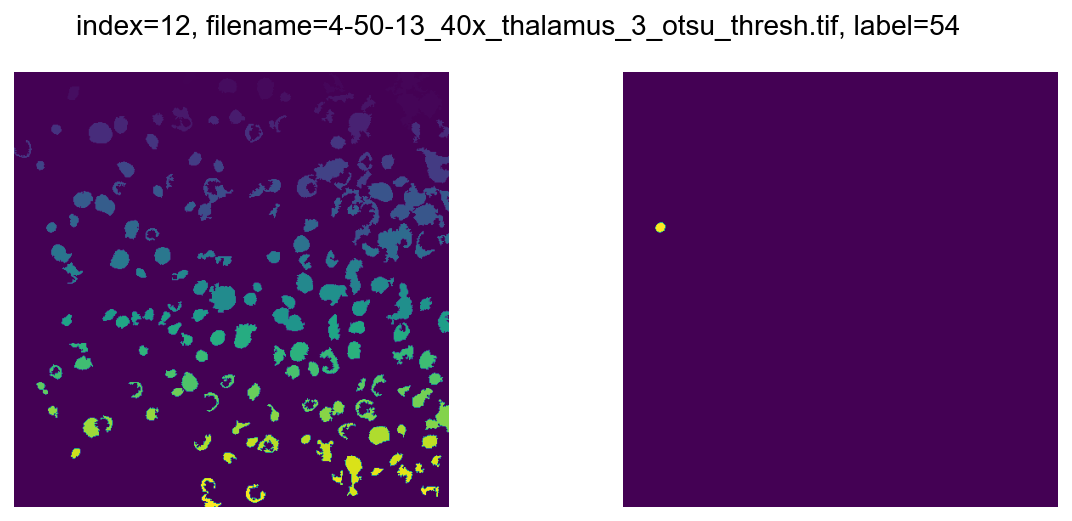

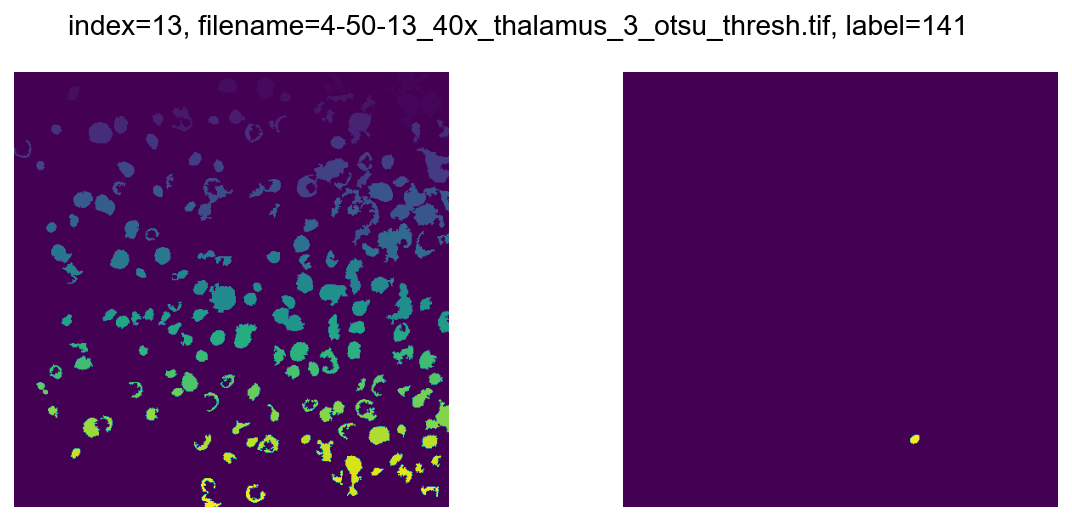

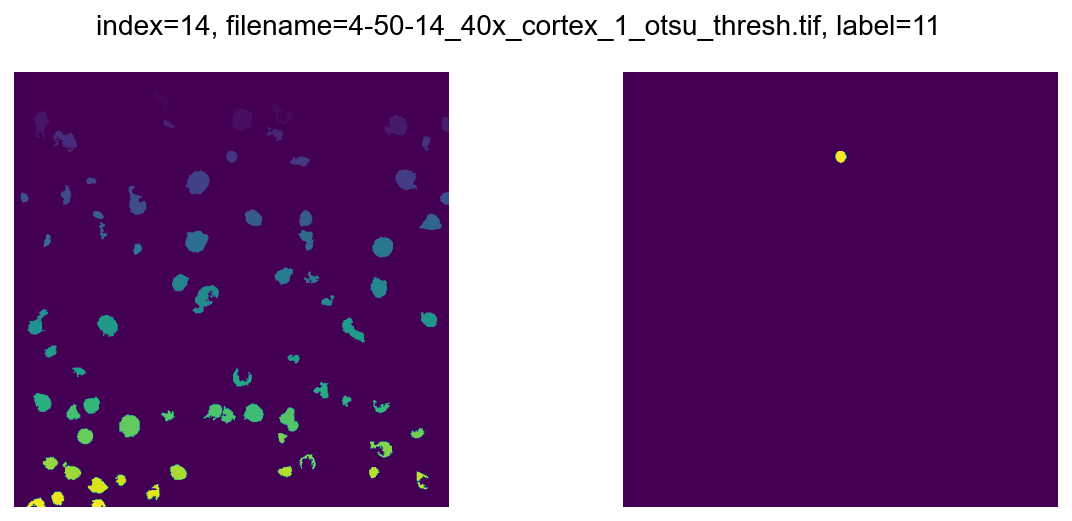

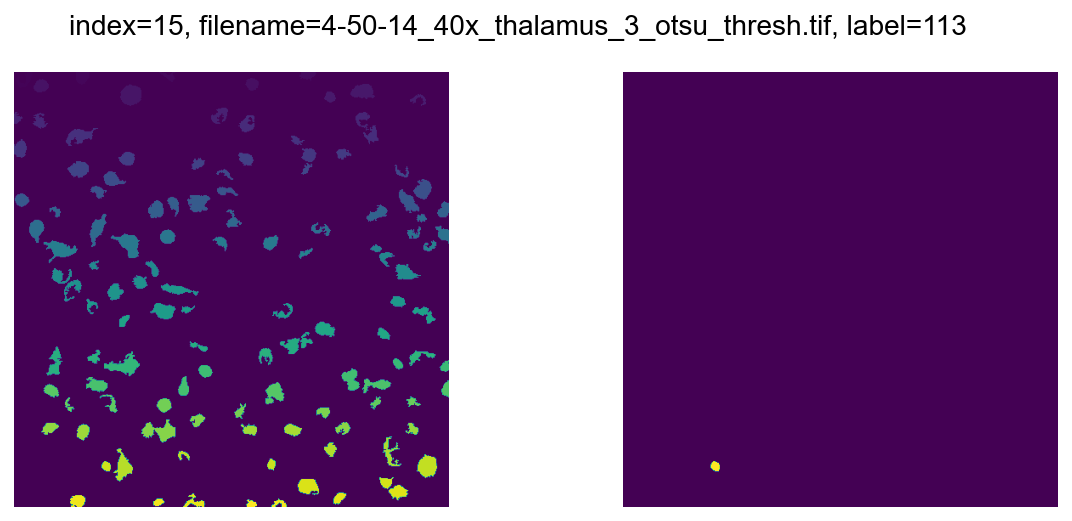

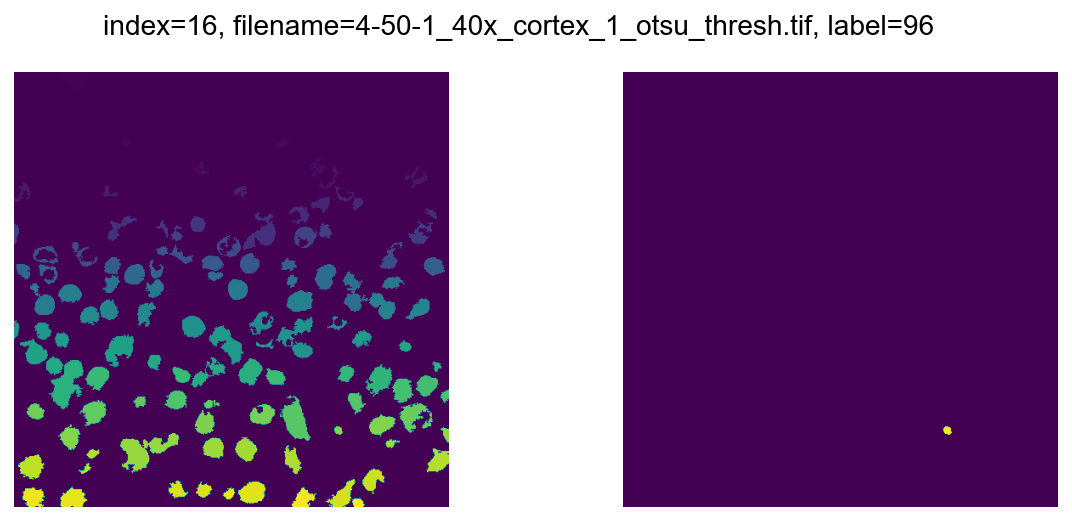

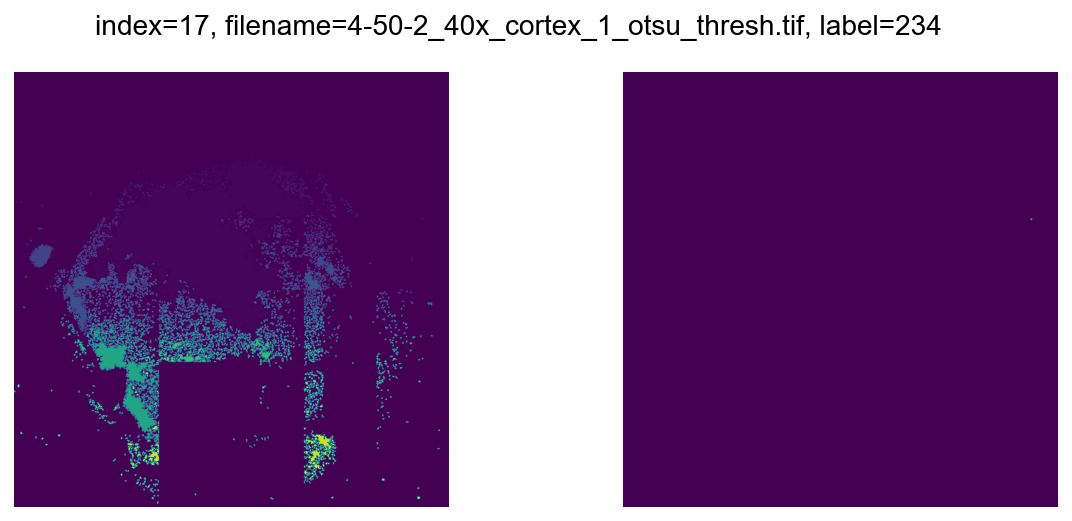

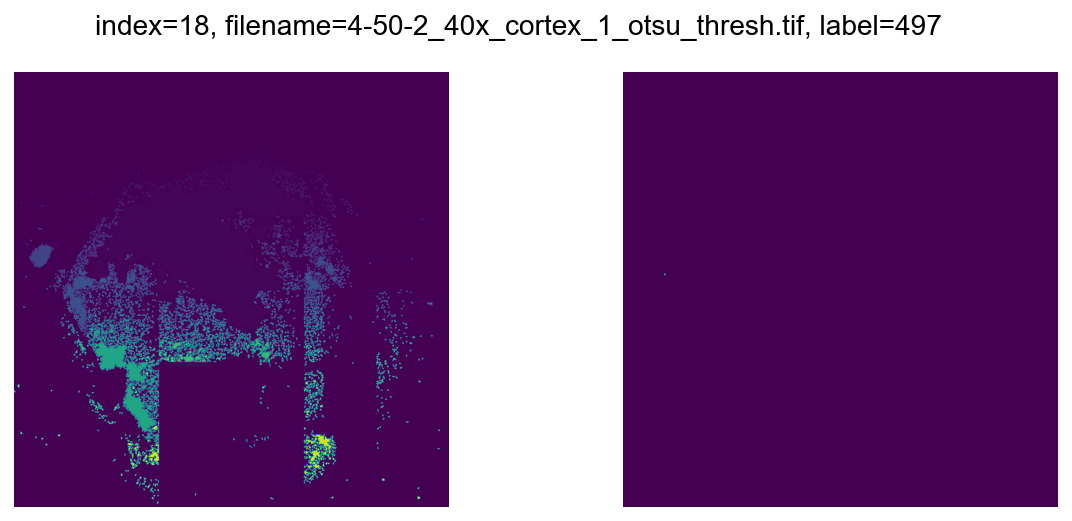

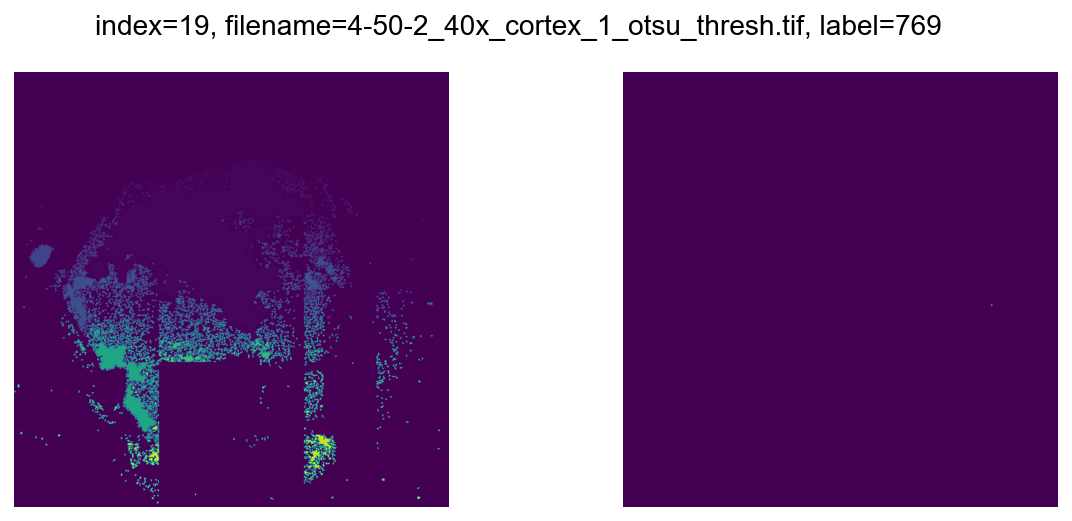

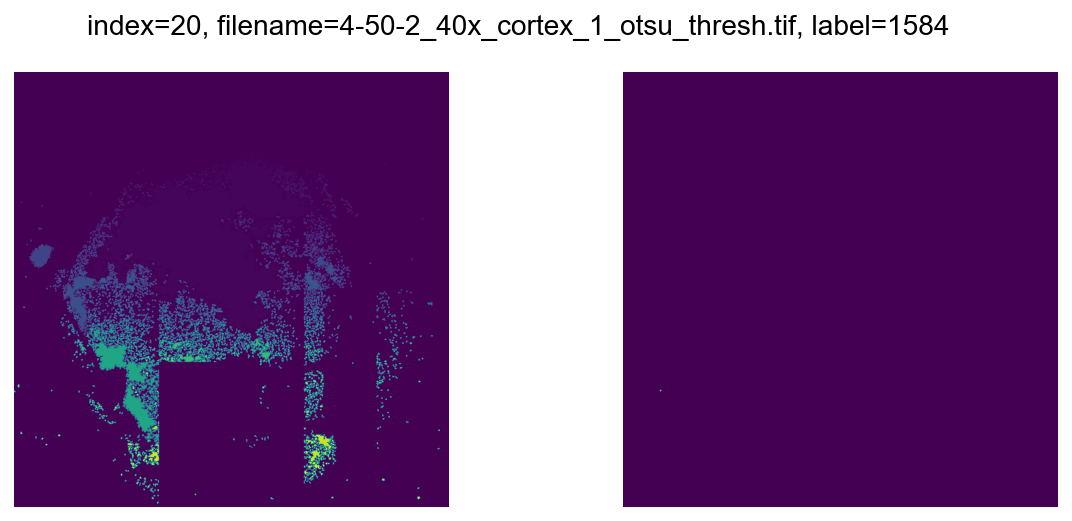

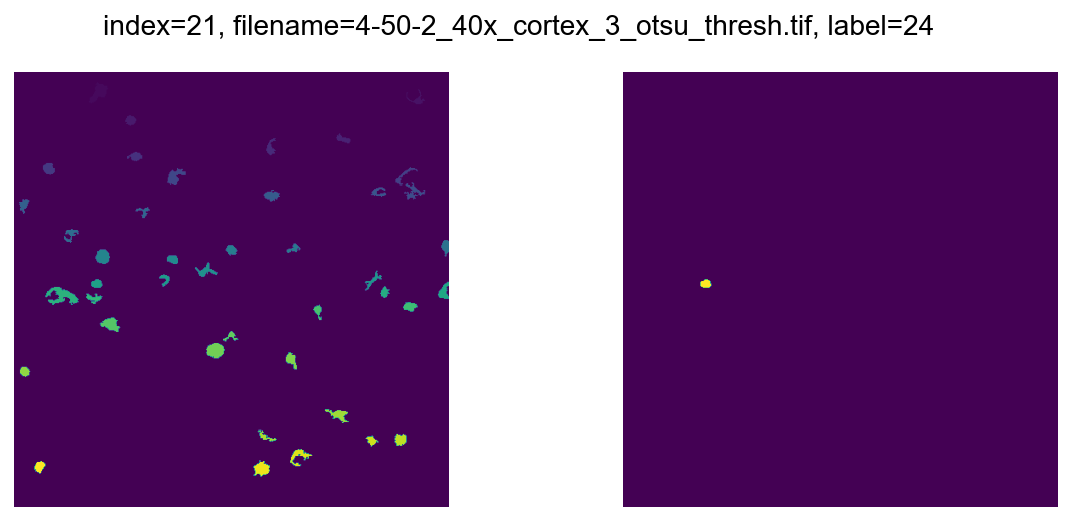

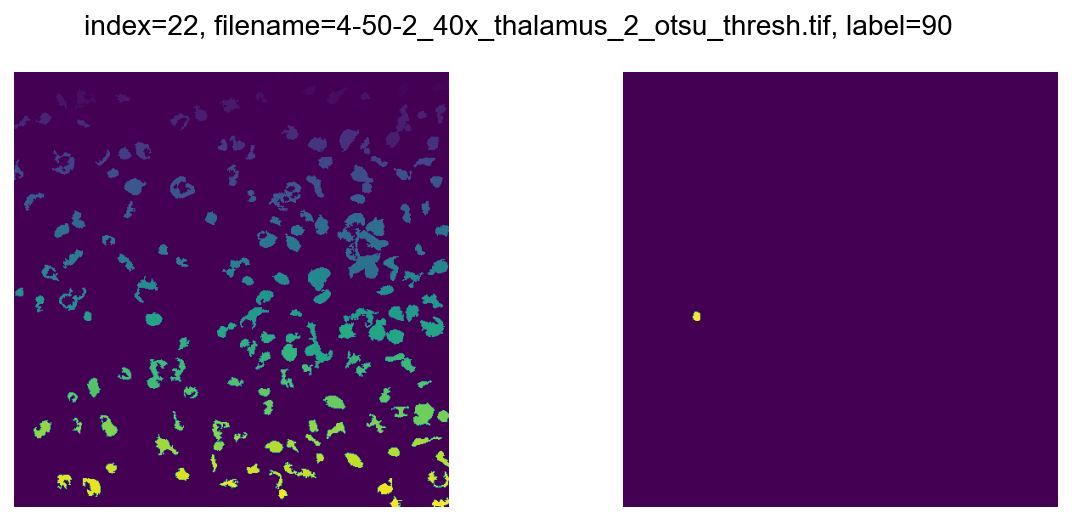

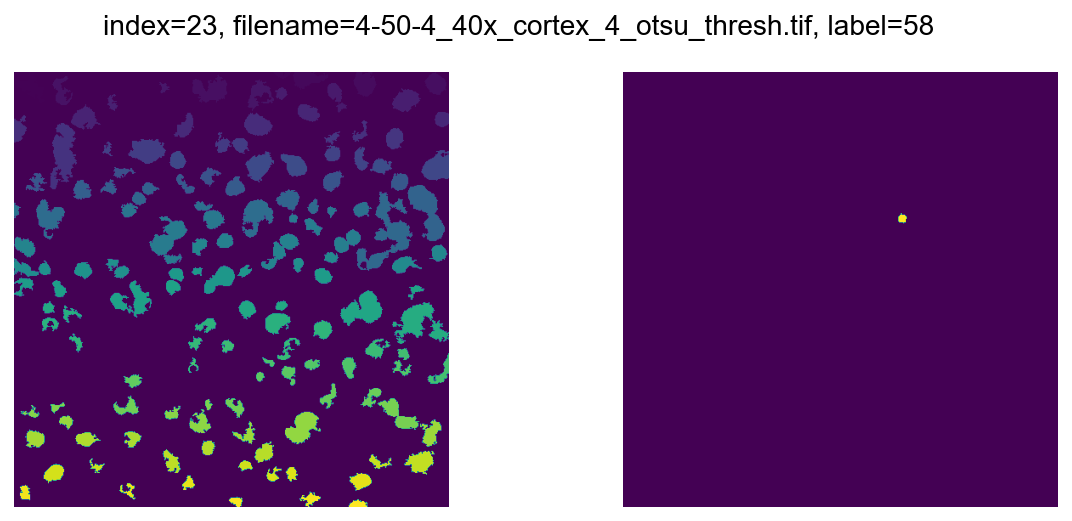

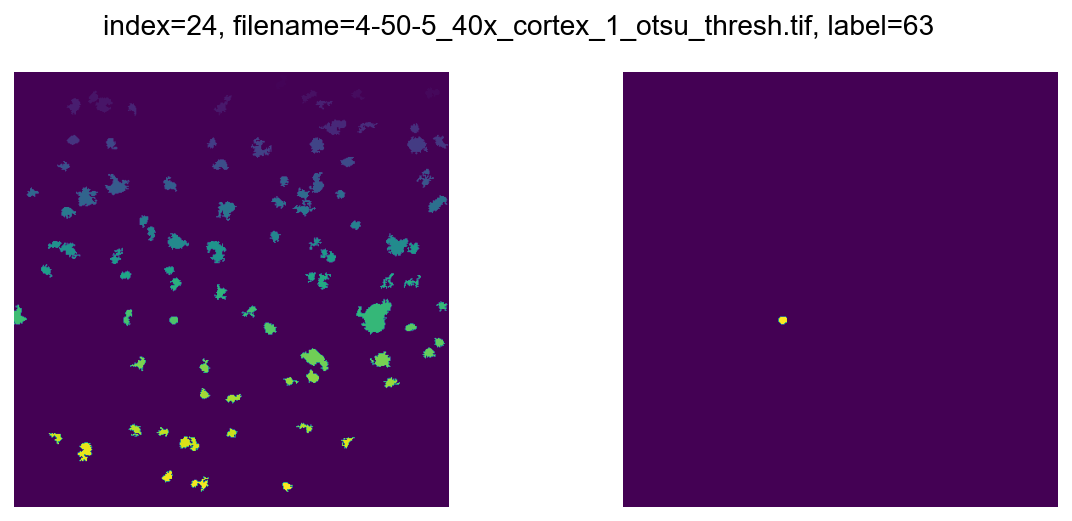

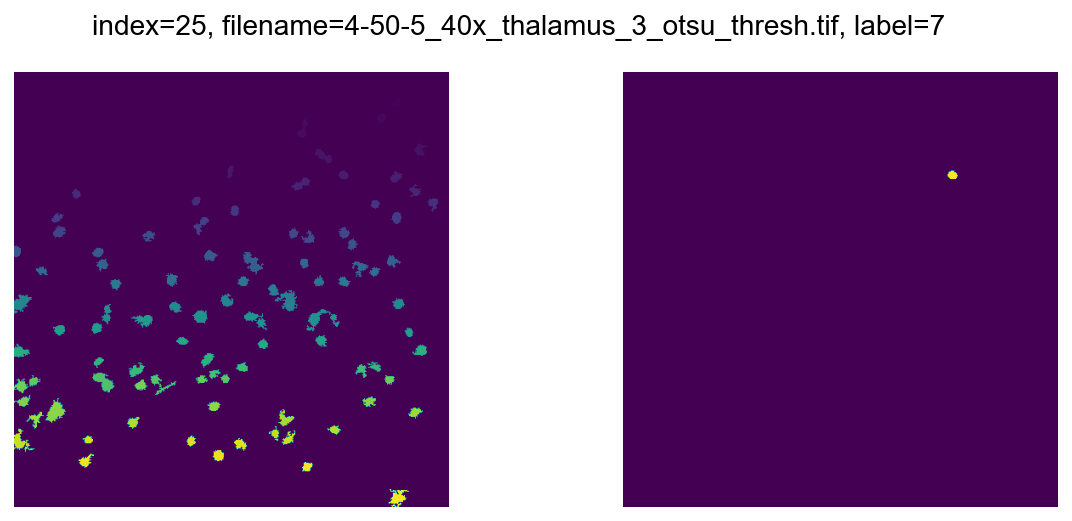

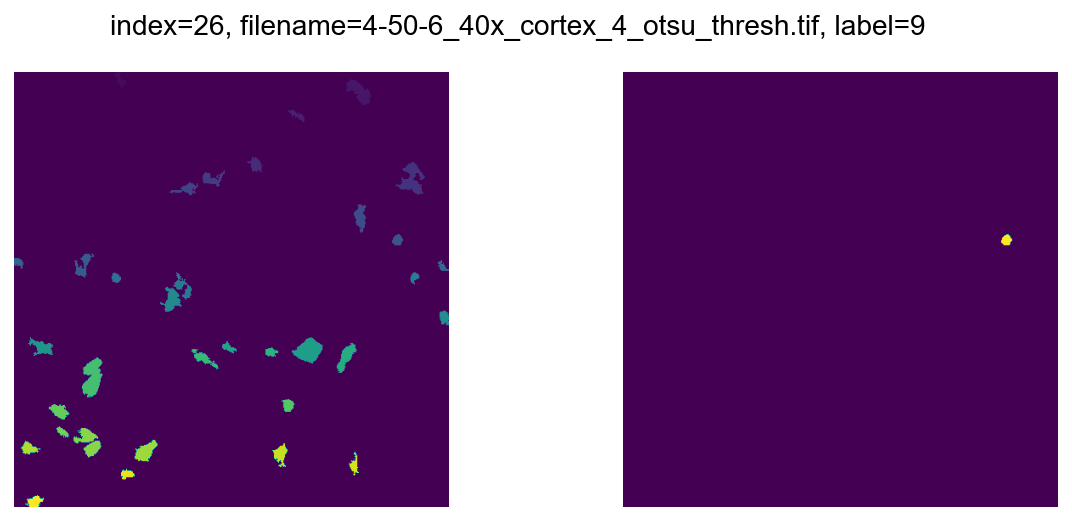

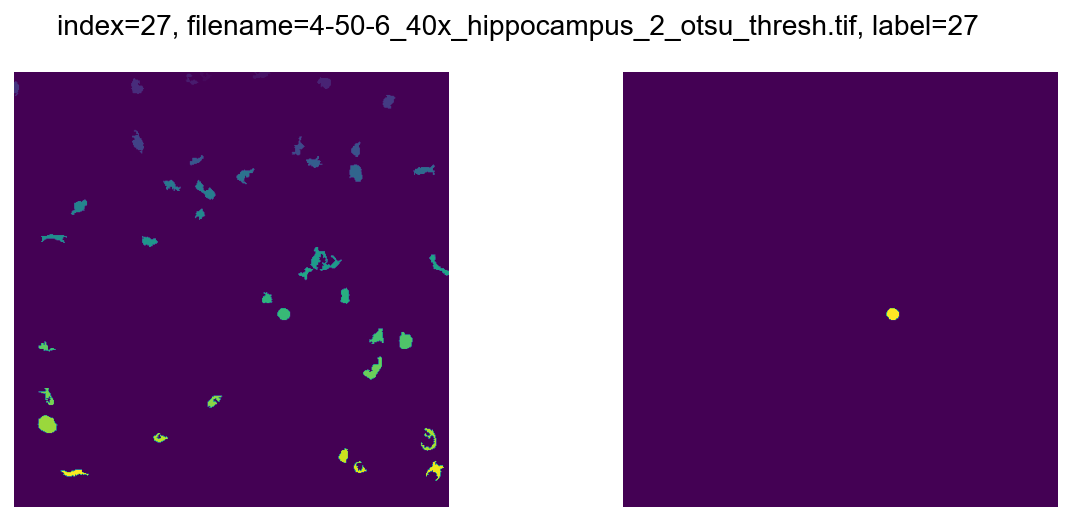

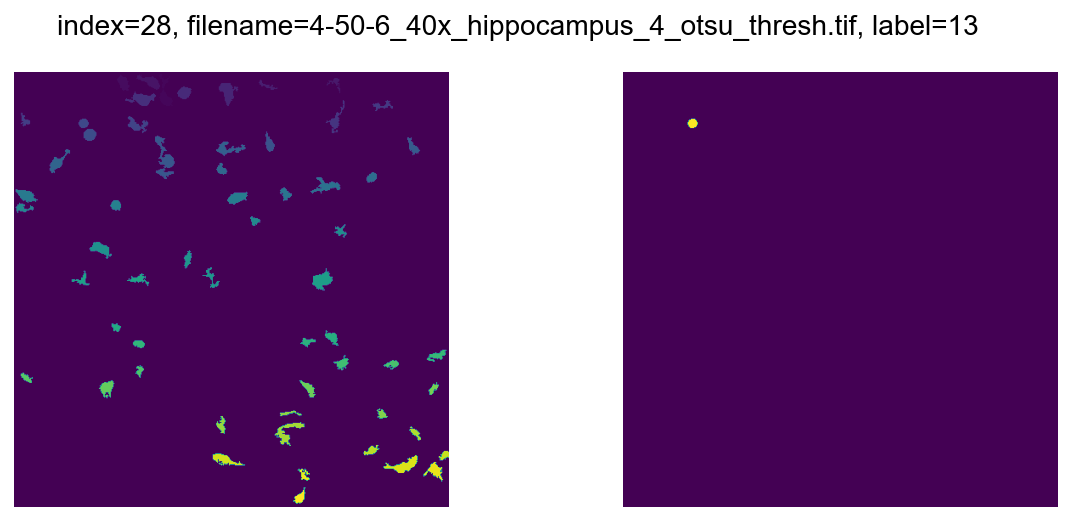

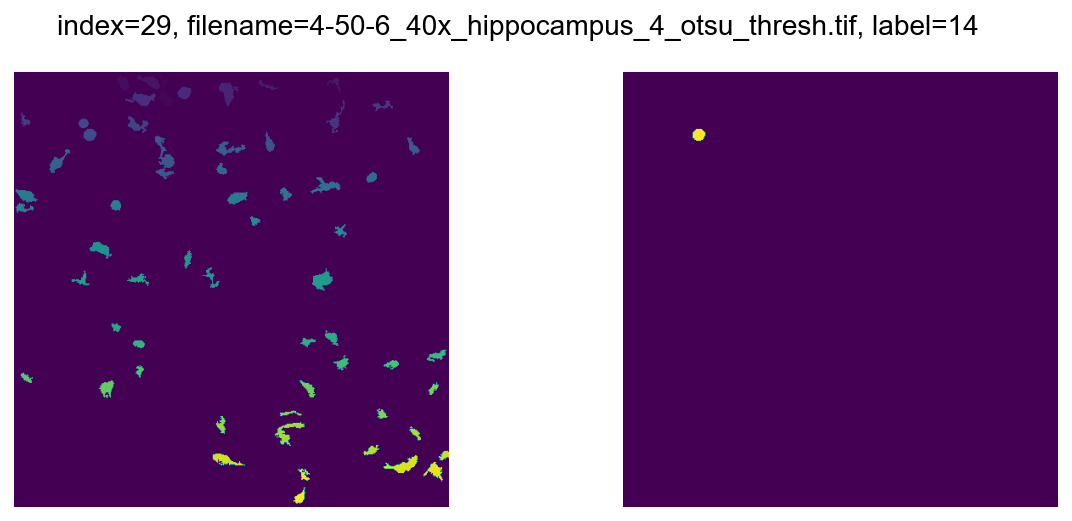

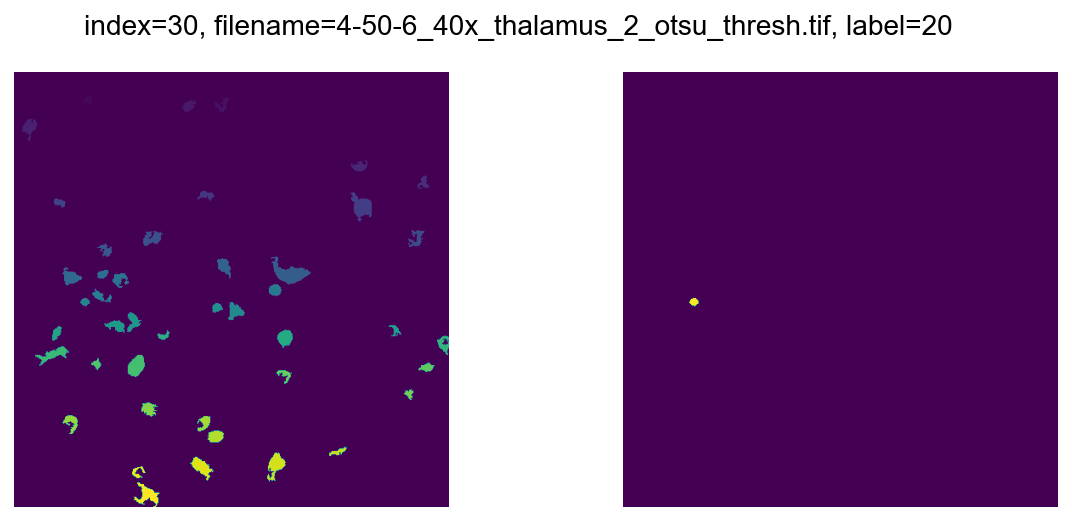

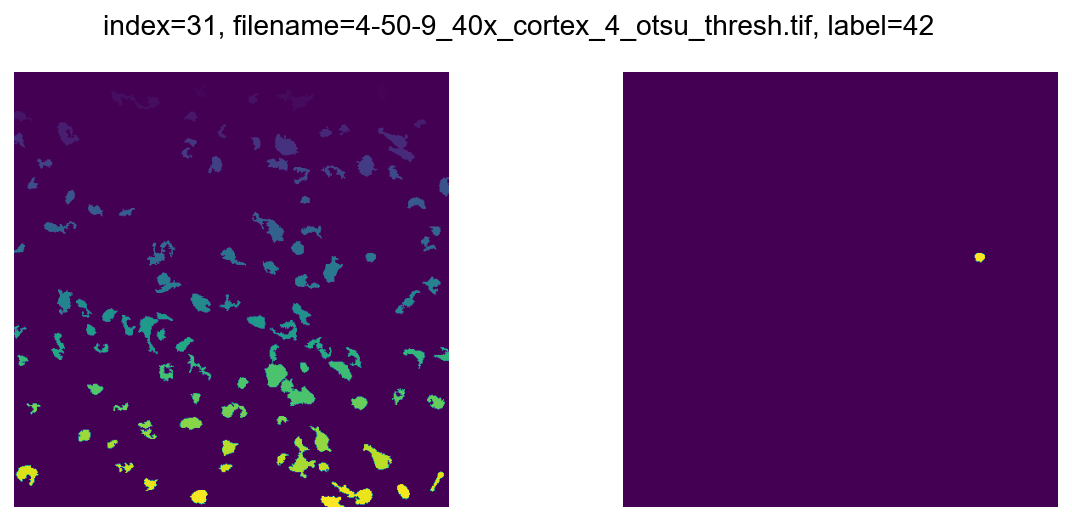

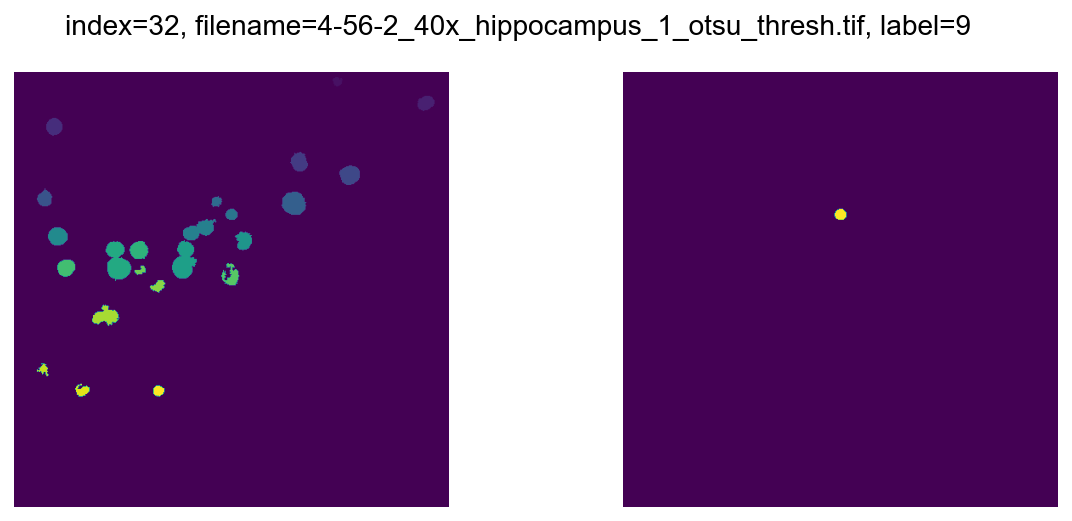

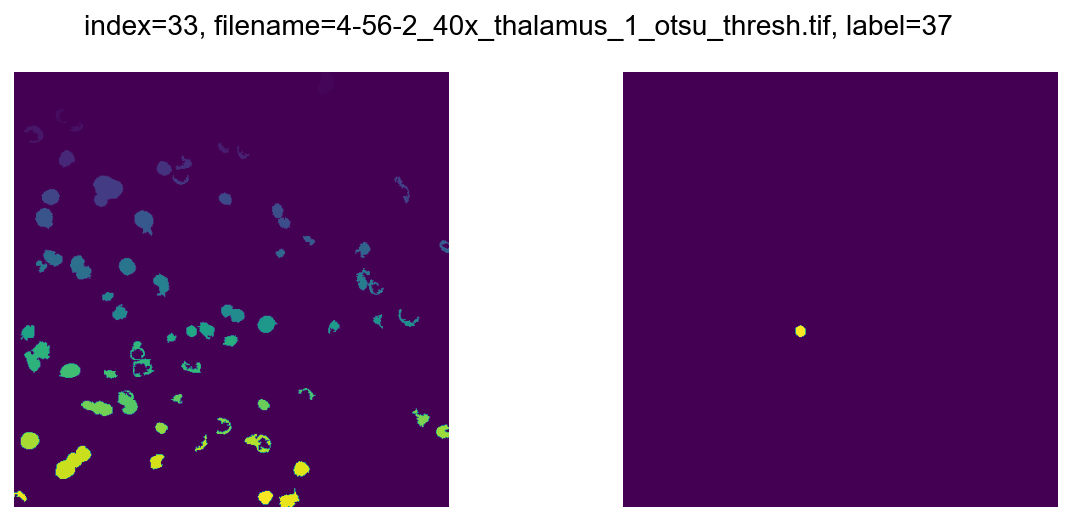

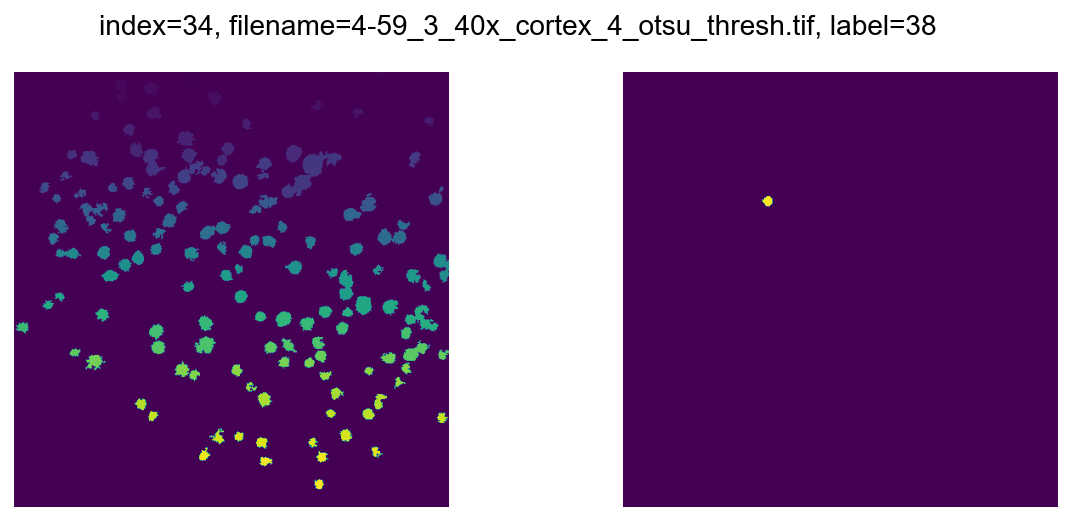

In [12]:
for i in range(over_range_df.shape[0]):
    filename = over_range_df['filename'].iloc[i]
    label = over_range_df['label'].iloc[i]
    img = io.imread(rf'C:\Files\github-projects\nance-lab-data\microfiber\0-rat-ogd-raw-data\{filename}')
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'index={i}, filename={filename}, label={label}', fontsize=14)
    axs[0].imshow(img)
    axs[0].set_axis_off()    
    axs[1].imshow(img==label)
    axs[1].set_axis_off()

## Appendix: fun visualization of all images in the dataset

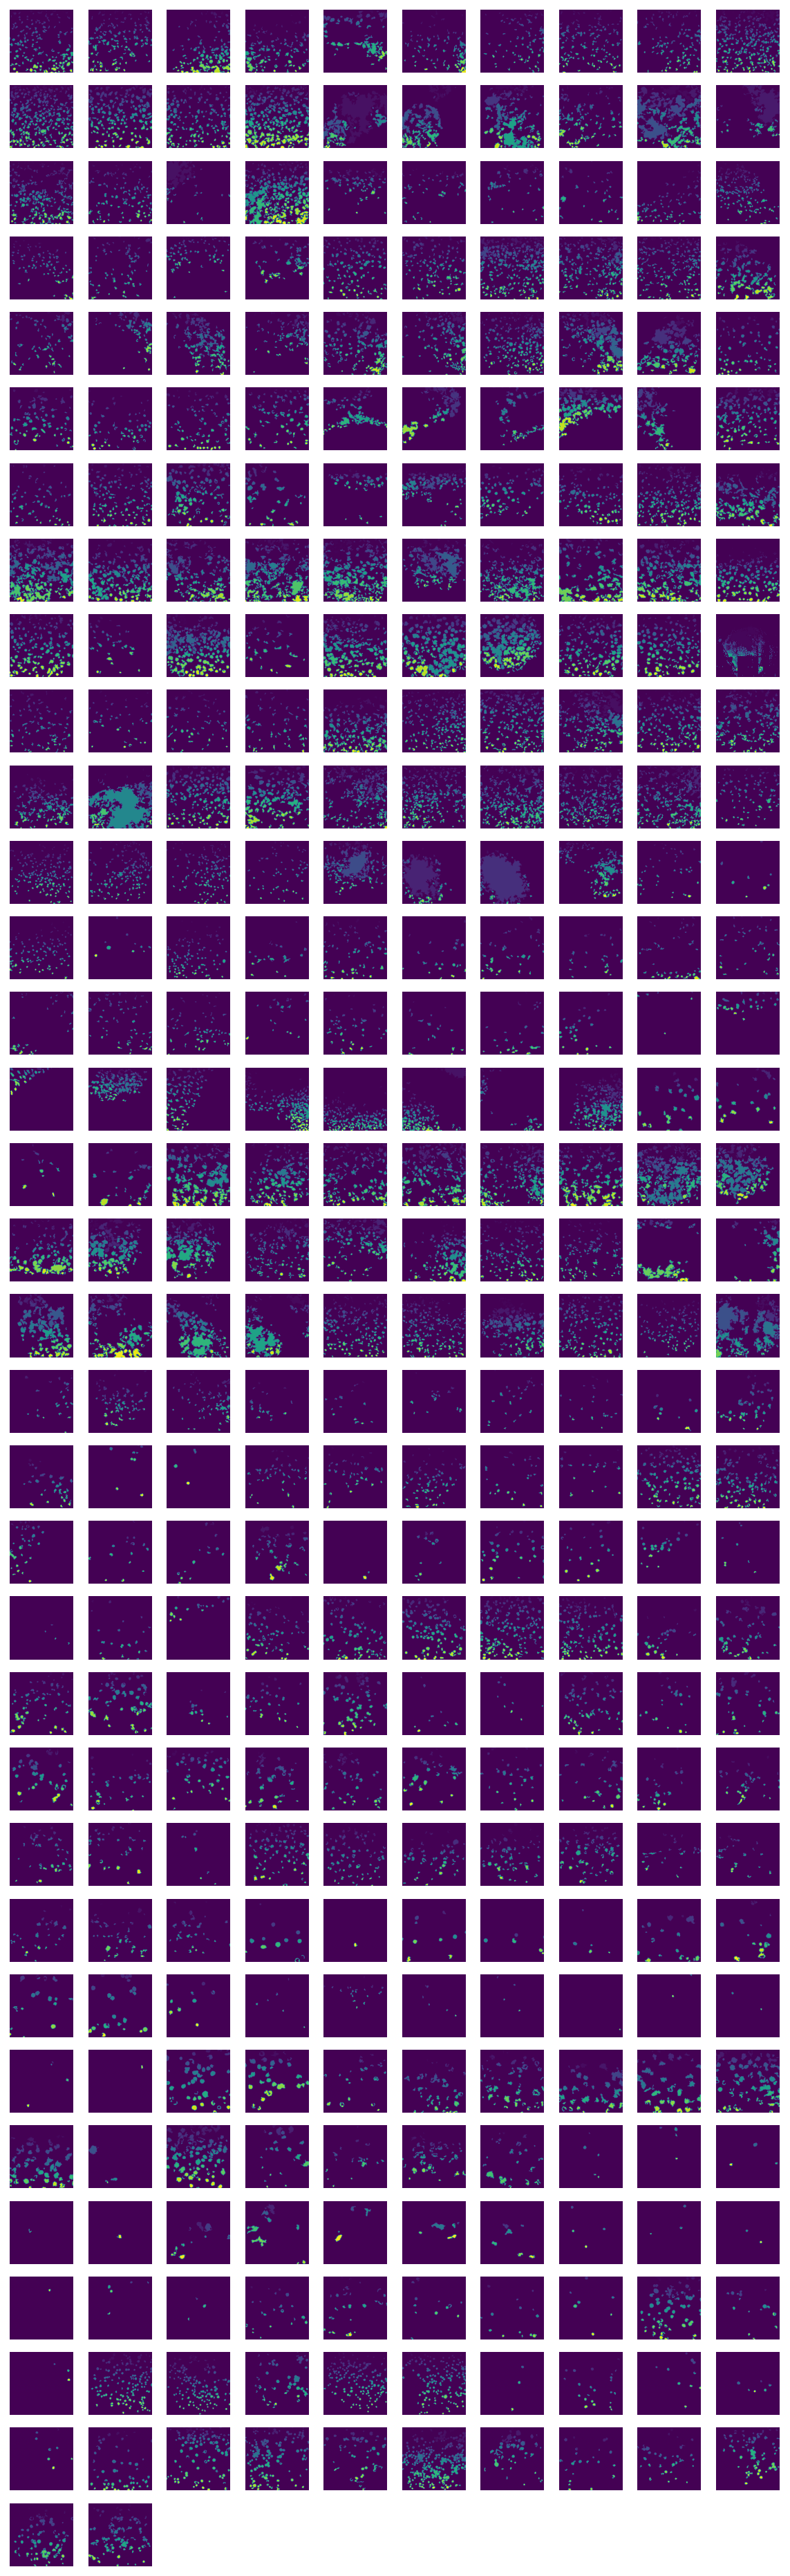

In [13]:
# plot all the images
filenames = np.unique(otsu_properties_df['filename'])
num_filenames = len(filenames)
col = 10
row = int(np.ceil(num_filenames / 10))
scale = 1

fig, axs = plt.subplots(row, col, figsize=(col*scale, row*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        axs[row_i, col_i].set_axis_off()
        if i < num_filenames:
            img = io.imread(rf'C:\Files\github-projects\nance-lab-data\microfiber\0-rat-ogd-raw-data\{filenames[i]}')
            axs[row_i, col_i].imshow(img)
fig.savefig(rf'{output_path}\all_imgs.png')